In [1]:
from math import *
import matplotlib.pyplot as plot

# Propiedades Materiales

In [2]:
creep_final=2.5
print("Coeficiente Final de deslizamiento (Creep): "+str(creep_final))
def_final=-0.0006
print("Deformación final de la Contracción :"+str(def_final))
fc=450
print("Resistencia a la compresión del Concreto :"+str(fc)+" kgf/cm2")
ft=0.8*1.5*sqrt(fc)
print("Resistencia a tensión del Concreto :"+str(ft)+" kgf/cm2")
Mod_Elast_Concreto=11000*sqrt(fc)
print("Módulo de Elasticidad del concreto :"+str(Mod_Elast_Concreto)+" kgf/cm2")
fy=4200
print("Esfuerzo de Fluencia de la malla de Acero:"+str(fy)+" kgf/cm2")
Mod_Elast_Acero=2000000
print("Módulo de Elasticidad del acero :"+str(Mod_Elast_Acero)+" kgf/cm2")
n=Mod_Elast_Acero/Mod_Elast_Concreto
print("Relación Modular :"+str(n))
Mod_Elast_Efectivo=Mod_Elast_Concreto/(1+creep_final)
print("Módulo de Elasticidad Efectivo :"+str(Mod_Elast_Efectivo)+" kgf/cm2")
n_efec=Mod_Elast_Acero/Mod_Elast_Efectivo
print("Relación Modular Efectiva :"+str(n_efec)+" kgf/cm2")
pmin=25/fy
print("Cuantía mínima :"+str(pmin))

Coeficiente Final de deslizamiento (Creep): 2.5
Deformación final de la Contracción :-0.0006
Resistencia a la compresión del Concreto :450 kgf/cm2
Resistencia a tensión del Concreto :25.455844122715714 kgf/cm2
Módulo de Elasticidad del concreto :233345.23779156068 kgf/cm2
Esfuerzo de Fluencia de la malla de Acero:4200 kgf/cm2
Módulo de Elasticidad del acero :2000000 kgf/cm2
Relación Modular :8.570991287109667
Módulo de Elasticidad Efectivo :66670.06794044591 kgf/cm2
Relación Modular Efectiva :29.998469504883836 kgf/cm2
Cuantía mínima :0.005952380952380952


# Función ancho de grieta

In [3]:
def grietas(L,t,Ac,db,n_var):
    As=n_var*3.1416*(db/20)**2
    p=As/Ac
    #Ecuacion 1
    so=db/(10*p)
    #Ecuacion 6
    C1=2*so/(3*L*10-2*so)
    #Ecuacion 12
    Ncr=n*p*ft*Ac/(C1+n*p*(1+C1))
    #Ecuacion 9
    SigC1=Ncr*(1+C1)/Ac
    #Ecuacion 19
    SigAv=(SigC1+ft)/2
    #Ecuacion 28
    e=-n_efec*p*(SigAv+def_final*Mod_Elast_Efectivo)/(n_efec*p*(SigAv+Mod_Elast_Efectivo*def_final)+ft)
    #Ecuacion 27
    s=2*so*(1+e)/3/e
    #Minimo numero de grietas
    m=ceil(L*10/s)
    #Espaciamiento 
    S=10*L/m
    #Ecucacion 16
    C2=2*so/(3*S-2*so)
    #Ecuacion 25
    N_inf=-n_efec*As/C2*(SigAv+def_final*Mod_Elast_Efectivo)
    #Ecuacion 17
    SigS2=N_inf/As
    
    #Fluencia del acero
    if SigS2>=fy:
        N_inf=As*fy
        
    #Esfuerzos modificados por fluencia del acero
    if SigS2<fy:
        SigS1=-C2*SigS2
        SigC1=(N_inf-SigS1*As)/Ac
        w=-(SigC1/Mod_Elast_Efectivo*(S-2/3*so)+def_final*S)
    else:
        SigS1=(Mod_Elast_Efectivo*p*fy+def_final*Mod_Elast_Acero)/(1+n_efec*p)
        SigC1=(fy*As-SigS1*As/Ac)
        w=-(SigS1*(3*L*10-2*so)+2*so*fy)/3/Mod_Elast_Acero
     
    #Verificar error de poca cuantia 
    if w<0:
        print("ERROR ACERO INSUFICIENTE, AUMENTAR: "+str(L)+" "+str(t))
    return w

# Prueba de 1 punto

In [4]:
print(grietas(425,6,600,9.525,5))

0.22536586674419873


# Armado de datos prueba 1

In [20]:
puntos_L=10
puntos_t=8
diam_barra=9.525

L=[]
for i in range(puntos_L):
    L.append((i+1)*850*0.5)
print("Longitudes: "+str(L))

t=[]
for i in range(puntos_t):
    t.append((i+6))
print("Espesores: "+str(t))

n_barras=[]
for i in range(puntos_t):
    n_barras.append(i+5)
print("Barras: "+str(n_barras))

Longitudes: [425.0, 850.0, 1275.0, 1700.0, 2125.0, 2550.0, 2975.0, 3400.0, 3825.0, 4250.0]
Espesores: [6, 7, 8, 9, 10, 11, 12, 13]
Barras: [5, 6, 7, 8, 9, 10, 11, 12]


# Anchos obtenidos

In [21]:
Anchos=[]
for i in range(len(t)):
    aux=[]
    for j in L:
        aux.append(round(grietas(j,t[i],t[i]*100,diam_barra,n_barras[i]),4))
    print(aux)
    Anchos.append(aux)

[0.2254, 0.2406, 0.2475, 0.2515, 0.2543, 0.2562, 0.2577, 0.2621, 0.2628, 0.2634]
[0.2145, 0.2258, 0.2374, 0.2399, 0.2413, 0.2461, 0.2465, 0.2467, 0.2496, 0.2495]
[0.2062, 0.2226, 0.2262, 0.2327, 0.2332, 0.237, 0.2368, 0.2394, 0.239, 0.2409]
[0.1997, 0.2152, 0.2232, 0.2239, 0.228, 0.2309, 0.2303, 0.2324, 0.234, 0.2333]
[0.1944, 0.2092, 0.2169, 0.2215, 0.2245, 0.2238, 0.2259, 0.2275, 0.2288, 0.2279]
[0.1963, 0.2099, 0.2116, 0.2161, 0.2191, 0.2212, 0.2227, 0.224, 0.2249, 0.2239]
[0.1936, 0.2064, 0.2121, 0.2155, 0.2177, 0.2193, 0.2181, 0.2193, 0.2202, 0.221]
[0.1913, 0.2034, 0.2088, 0.212, 0.2141, 0.2156, 0.2167, 0.2175, 0.2182, 0.2188]


# Grafica Longitud del elemento VS Ancho de grieta

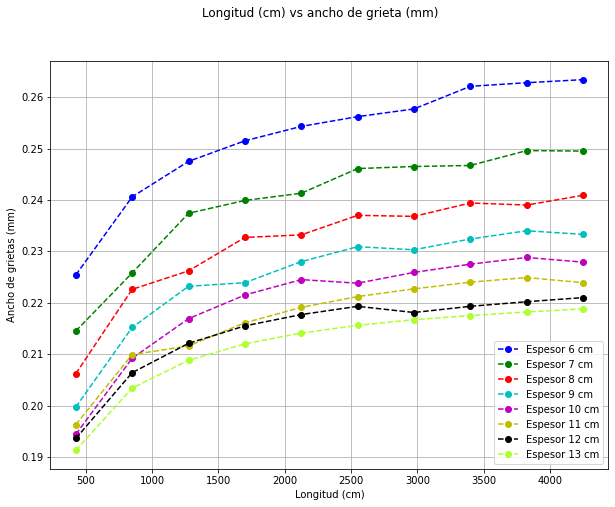

In [22]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

for k in range(len(Anchos)):
    ax.plot(L,Anchos[k], linestyle='--', marker='o', color=colors[k],label="Espesor "+str(t[k])+" cm") 
ax.legend()

ax.set_xlabel('Longitud (cm)')
ax.set_ylabel('Ancho de grietas (mm)')

# Establecer título
plot.suptitle("Longitud (cm) vs ancho de grieta (mm)")

plot.grid(True)

# Mostrar
plot.show()

# Armado de datos prueba 2

In [15]:
puntos_L=10
puntos_b=5
diam_barra=9.525

L=[]
for i in range(puntos_L):
    L.append((i+1)*850*0.5)
print("Longitudes: "+str(L))

n_barras=[]
for i in range(puntos_b):
    n_barras.append(i+5)
print("Barras: "+str(n_barras))

Longitudes: [425.0, 850.0, 1275.0, 1700.0, 2125.0, 2550.0, 2975.0, 3400.0, 3825.0, 4250.0]
Barras: [5, 6, 7, 8, 9]


# Anchos obtenidos

In [16]:
Anchos=[]
t=6
for i in L:
    aux=[]
    for j in n_barras:
        aux.append(round(grietas(i,t,t*100,diam_barra,j),4))
    print(aux)
    Anchos.append(aux)

[0.2254, 0.1683, 0.1309, 0.1044, 0.0866]
[0.2406, 0.1786, 0.1371, 0.1096, 0.0895]
[0.2475, 0.1831, 0.1398, 0.1109, 0.0906]
[0.2515, 0.1832, 0.1413, 0.1123, 0.0917]
[0.2543, 0.1853, 0.1422, 0.1126, 0.092]
[0.2562, 0.1868, 0.1429, 0.1128, 0.0922]
[0.2577, 0.1879, 0.1434, 0.1134, 0.0923]
[0.2621, 0.1888, 0.1438, 0.1135, 0.0924]
[0.2628, 0.1895, 0.1441, 0.1135, 0.0925]
[0.2634, 0.1888, 0.1437, 0.1139, 0.0926]


# Grafica Nro de varillas VS Ancho de grieta

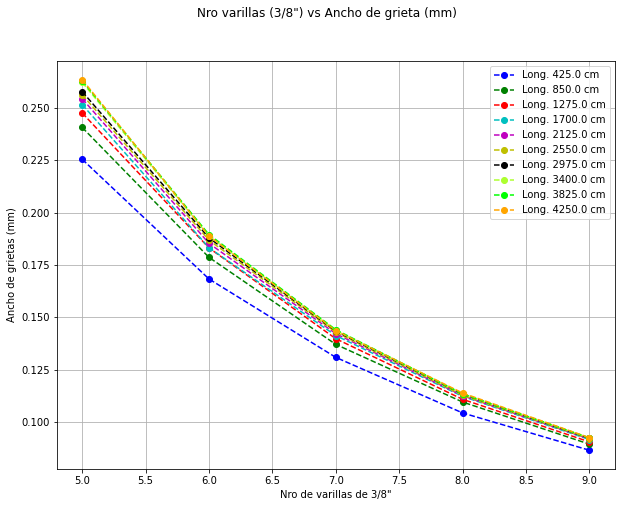

In [18]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

for k in range(len(Anchos)):
    ax.plot(n_barras,Anchos[k], linestyle='--', marker='o', color=colors[k],label="Long. "+str(L[k])+" cm") 
ax.legend()

ax.set_xlabel('Nro de varillas de 3/8"')
ax.set_ylabel('Ancho de grietas (mm)')

# Establecer título
plot.suptitle("Nro varillas (3/8\") vs Ancho de grieta (mm)")

plot.grid(True)

# Mostrar
plot.show()

# Gráfico de Cuantía vs ancho de grieta

In [11]:
cuantias=[]
for i in range(puntos_b):
    cuantias.append((n_barras[i]*3.1416*(diam_barra/20)**2)/(t*100))
print("Cuantias: "+str(cuantias))

Cuantias: [0.0059379921562499995, 0.0071255905875, 0.00831318901875, 0.009500787450000001, 0.01068838588125]


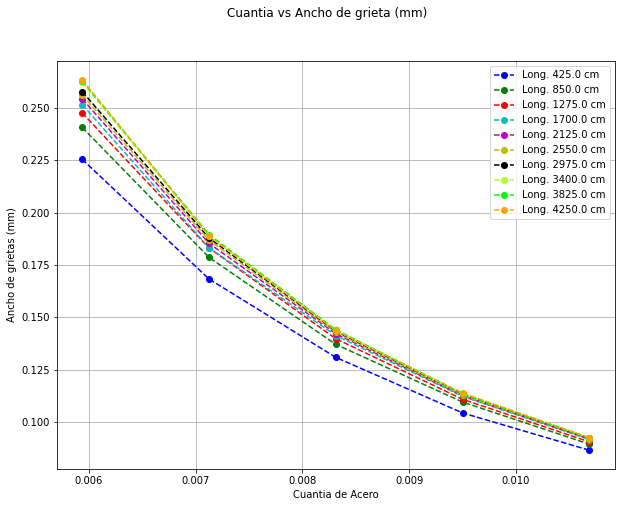

In [14]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

for k in range(len(Anchos)):
    ax.plot(cuantias,Anchos[k], linestyle='--', marker='o', color=colors[k],label="Long. "+str(L[k])+" cm") 
ax.legend()

ax.set_xlabel('Cuantia de Acero')
ax.set_ylabel('Ancho de grietas (mm)')

# Establecer título
plot.suptitle("Cuantia vs Ancho de grieta (mm)")

plot.grid(True)

# Mostrar
plot.show()